In [65]:
#imports
import pandas as pd
import csv
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

from geopy.geocoders import Nominatim 
import plotly.express as px   
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from dotenv import load_dotenv
import os


In [66]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")
px.set_mapbox_access_token(map_box_api)

In [67]:
# Verify keys
print(type(map_box_api))

<class 'str'>


In [68]:
# Reading location csv
us_path = Path("location.csv")
us_df = pd.read_csv(us_path)
us_df.head()

,Country,Country code,Continent,Visitors
0,Iceland,ISL,EU,"2,225,000"
1,Switzerland,CHE,EU,9889000
2,New Zealand,NZL,OC,3555000
3,Germany,DEU,EU,37452000
4,Norway,NOR,EU,6252000


In [69]:
#geopy in action
country_names = us_df['Country']

longitude =[]
latitude =[]
geolocator = Nominatim(user_agent="Trips")

for c in country_names.values:
    location = geolocator.geocode(c)
    latitude.append(location.latitude)
    longitude.append(location.longitude)


In [70]:
us_df['Latitude'] = latitude
us_df['Longitude'] = longitude

In [71]:
us_df.head()

,Country,Country code,Continent,Visitors,Latitude,Longitude
0,Iceland,ISL,EU,"2,225,000",64.984182,-18.105901
1,Switzerland,CHE,EU,9889000,46.798562,8.231974
2,New Zealand,NZL,OC,3555000,-41.500083,172.834408
3,Germany,DEU,EU,37452000,51.083420,10.423447
4,Norway,NOR,EU,6252000,60.500021,9.099972


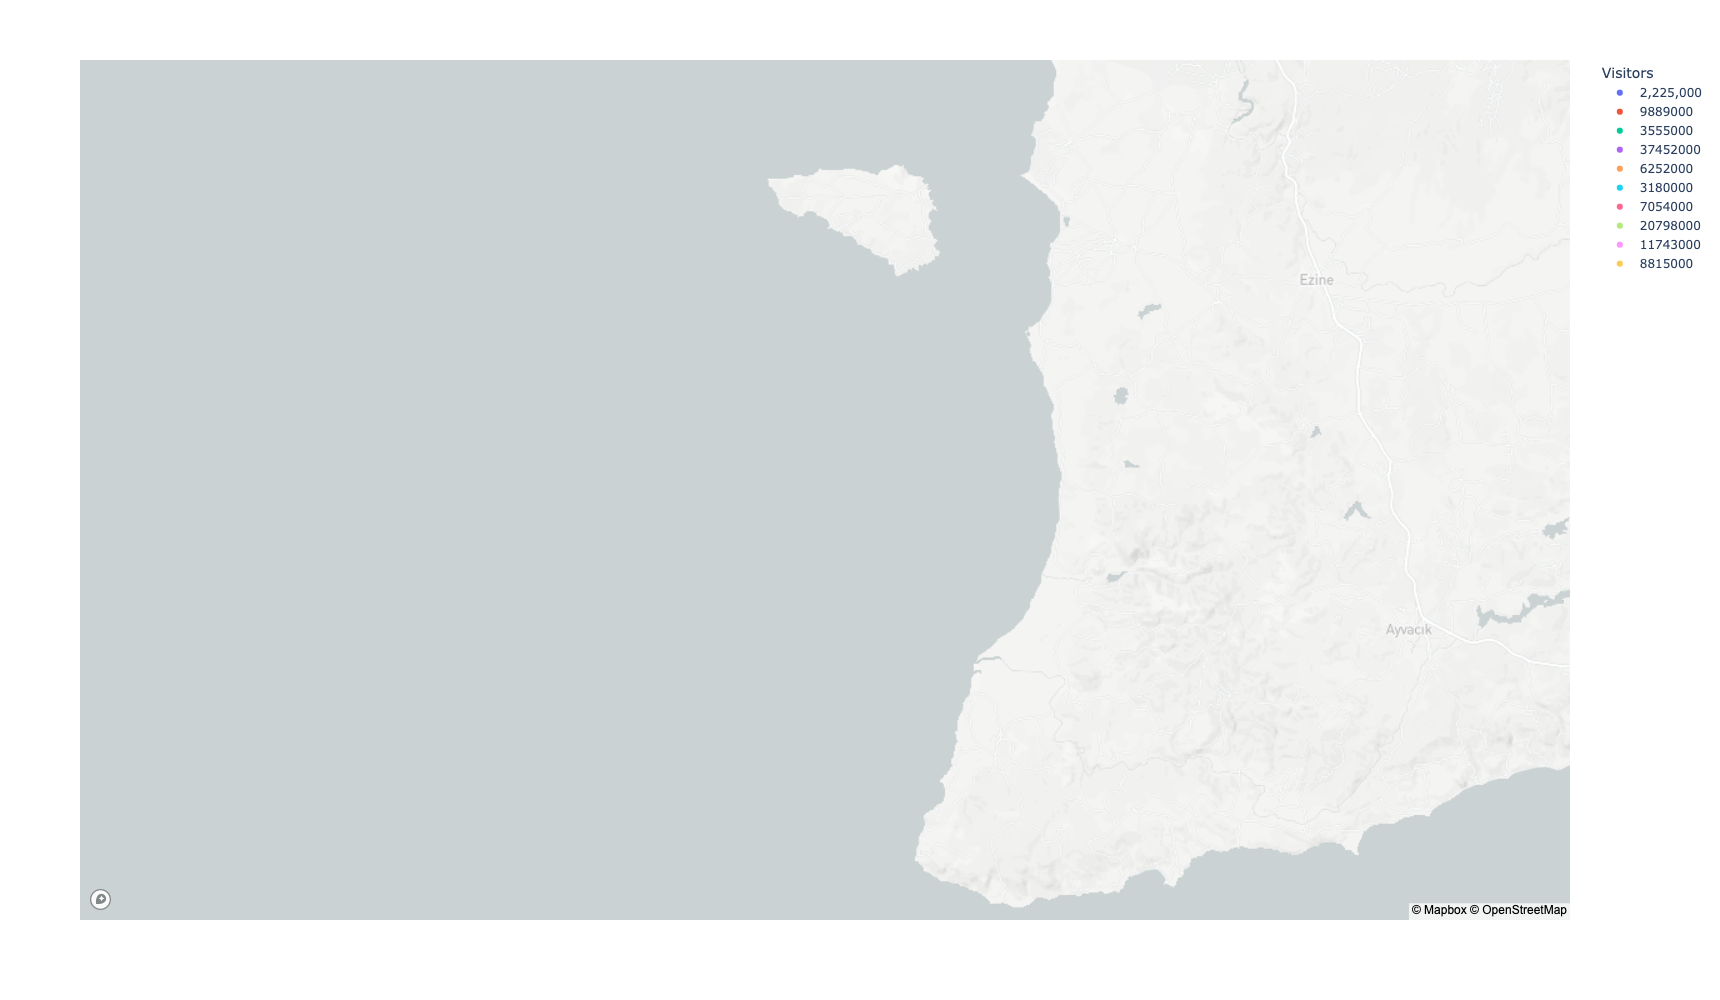

In [79]:
neighborhood_scatter_mapbox = px.scatter_mapbox(
    us_df, 
    lat="Latitude", 
    lon="Longitude",     
    color="Visitors", 
    #size="Visitors",
    #title="Average Sale Price Per Square Foot and Gross Rent In San Francisco",
    color_continuous_scale=px.colors.sequential.Bluered, 
    hover_name="Country",
    size_max=50,
    zoom=10,
    width=1000, 
    height=1000
)
neighborhood_scatter_mapbox.show()